In [1]:
import numpy as np
from numpy import random
from numpy.random import randint
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("fifa.csv")
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.drop(['Nationality','Flag','Club Logo','Preferred Foot','Weak Foot','Skill Moves','Photo','Potential','Club Logo',
'Preferred Foot','Weak Foot','Skill Moves','Work Rate','Body Type','Jersey Number'],inplace=True,axis=1)

In [4]:
df.drop(df.columns[14:46],axis=1,inplace=True)

In [5]:
df.drop(['GKPositioning','GKReflexes'],inplace=True, axis=1)

In [6]:
#4.Check for missing values and do a mean imputation where necessary.

missing_values=df.isnull().sum()
missing_values

ID                              0
Name                            0
Age                             0
Overall                         0
Club                          241
Value                           0
Wage                            0
International Reputation       48
Position                       60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Release Clause               1564
dtype: int64

In [7]:
# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)
percent

ID                           0.000000
Name                         0.000000
Age                          0.000000
Overall                      0.000000
Club                         1.323667
Value                        0.000000
Wage                         0.000000
International Reputation     0.263635
Position                     0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Release Clause               8.590103
dtype: float64

In [8]:
# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)
percent

Loaned From                 93.057615
Release Clause               8.590103
Joined                       8.529686
Contract Valid Until         1.587302
Club                         1.323667
Position                     0.329544
International Reputation     0.263635
Height                       0.263635
Weight                       0.263635
ID                           0.000000
Name                         0.000000
Age                          0.000000
Overall                      0.000000
Value                        0.000000
Wage                         0.000000
dtype: float64

In [9]:
#Convert to Float after getting rid of currency symbol and suffix.
df['Value']=df['Value'].str.strip('€MK')
df['Wage']=df['Wage'].str.strip('€KM')
df['Release Clause']=df['Release Clause'].str.strip('€MK')
df

,ID,Name,Age,Overall,Club,Value,Wage,International Reputation,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,FC Barcelona,110.5,565,5.0,RF,"Jul 1, 2004",NaN,2021,5'7,159lbs,226.5
1,20801,Cristiano Ronaldo,33,94,Juventus,77,405,5.0,ST,"Jul 10, 2018",NaN,2022,6'2,183lbs,127.1
2,190871,Neymar Jr,26,92,Paris Saint-Germain,118.5,290,5.0,LW,"Aug 3, 2017",NaN,2022,5'9,150lbs,228.1
3,193080,De Gea,27,91,Manchester United,72,260,4.0,GK,"Jul 1, 2011",NaN,2020,6'4,168lbs,138.6
4,192985,K. De Bruyne,27,91,Manchester City,102,355,4.0,RCM,"Aug 30, 2015",NaN,2023,5'11,154lbs,196.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,Crewe Alexandra,60,1,1.0,CM,"May 3, 2017",NaN,2019,5'9,134lbs,143
18203,243165,N. Christoffersson,19,47,Trelleborgs FF,60,1,1.0,ST,"Mar 19, 2018",NaN,2020,6'3,170lbs,113
18204,241638,B. Worman,16,47,Cambridge United,60,1,1.0,ST,"Jul 1, 2017",NaN,2021,5'8,148lbs,165
18205,246268,D. Walker-Rice,17,47,Tranmere Rovers,60,1,1.0,RW,"Apr 24, 2018",NaN,2019,5'10,154lbs,143


In [10]:
df.Value= df.Value.astype(float)
#changing the dtype from object to float
df.Wage= df.Wage.astype(float)


In [11]:
#Year as a string, in some cases complete date as string	Convert to int with only year
df['Joined']=df['Joined'].str.split(", ",1).str[1]

In [12]:
#impute 0 inplace of all NaN values
df['Joined'].fillna(np.nan,inplace=True)

In [14]:
df['Joined'].mode()


0    2018
dtype: object

In [15]:
df['Joined'].replace(np.nan,2018,inplace=True)

In [16]:
#Convert to Float with decimal points
df['Height']=df['Height'].str.replace("'",'.')


In [17]:
#changing the dtype of height to float
df.Height=df.Height.astype(float)


In [18]:
#Contains the suffix lbs 	Remove the suffix and convert to float
df['Weight']=df['Weight'].str.strip('lbs')

In [19]:
df.Weight=df.Weight.astype(float)
df

,ID,Name,Age,Overall,Club,Value,Wage,International Reputation,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,FC Barcelona,110.5,565.0,5.0,RF,2004,NaN,2021,5.70,159.0,226.5
1,20801,Cristiano Ronaldo,33,94,Juventus,77.0,405.0,5.0,ST,2018,NaN,2022,6.20,183.0,127.1
2,190871,Neymar Jr,26,92,Paris Saint-Germain,118.5,290.0,5.0,LW,2017,NaN,2022,5.90,150.0,228.1
3,193080,De Gea,27,91,Manchester United,72.0,260.0,4.0,GK,2011,NaN,2020,6.40,168.0,138.6
4,192985,K. De Bruyne,27,91,Manchester City,102.0,355.0,4.0,RCM,2015,NaN,2023,5.11,154.0,196.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,Crewe Alexandra,60.0,1.0,1.0,CM,2017,NaN,2019,5.90,134.0,143
18203,243165,N. Christoffersson,19,47,Trelleborgs FF,60.0,1.0,1.0,ST,2018,NaN,2020,6.30,170.0,113
18204,241638,B. Worman,16,47,Cambridge United,60.0,1.0,1.0,ST,2017,NaN,2021,5.80,148.0,165
18205,246268,D. Walker-Rice,17,47,Tranmere Rovers,60.0,1.0,1.0,RW,2018,NaN,2019,5.10,154.0,143


In [20]:
#changing the dtype to int
df.Joined=df.Joined.astype(int)
df.dtypes

ID                            int64
Name                         object
Age                           int64
Overall                       int64
Club                         object
Value                       float64
Wage                        float64
International Reputation    float64
Position                     object
Joined                        int32
Loaned From                  object
Contract Valid Until         object
Height                      float64
Weight                      float64
Release Clause               object
dtype: object

In [21]:
df['Contract Valid Until']=df['Contract Valid Until'].astype('datetime64')

In [22]:
df['Release Clause'] = df['Release Clause'].astype(float)
df

,ID,Name,Age,Overall,Club,Value,Wage,International Reputation,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
0,158023,L. Messi,31,94,FC Barcelona,110.5,565.0,5.0,RF,2004,NaN,2021-01-01,5.70,159.0,226.5
1,20801,Cristiano Ronaldo,33,94,Juventus,77.0,405.0,5.0,ST,2018,NaN,2022-01-01,6.20,183.0,127.1
2,190871,Neymar Jr,26,92,Paris Saint-Germain,118.5,290.0,5.0,LW,2017,NaN,2022-01-01,5.90,150.0,228.1
3,193080,De Gea,27,91,Manchester United,72.0,260.0,4.0,GK,2011,NaN,2020-01-01,6.40,168.0,138.6
4,192985,K. De Bruyne,27,91,Manchester City,102.0,355.0,4.0,RCM,2015,NaN,2023-01-01,5.11,154.0,196.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,Crewe Alexandra,60.0,1.0,1.0,CM,2017,NaN,2019-01-01,5.90,134.0,143.0
18203,243165,N. Christoffersson,19,47,Trelleborgs FF,60.0,1.0,1.0,ST,2018,NaN,2020-01-01,6.30,170.0,113.0
18204,241638,B. Worman,16,47,Cambridge United,60.0,1.0,1.0,ST,2017,NaN,2021-01-01,5.80,148.0,165.0
18205,246268,D. Walker-Rice,17,47,Tranmere Rovers,60.0,1.0,1.0,RW,2018,NaN,2019-01-01,5.10,154.0,143.0


In [23]:
import datetime

# EXPLORATORY DATA ANALYSIS

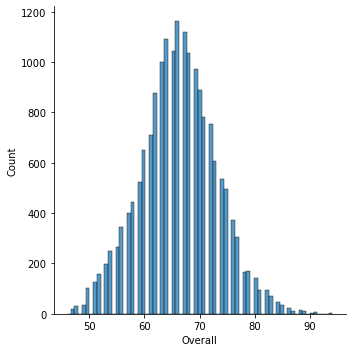

In [24]:

#1.	Plot the distribution of Overall rating for all players.
sns.displot(df['Overall'])
plt.show()
#in this we can see the overall rating of players 65-75 is higher

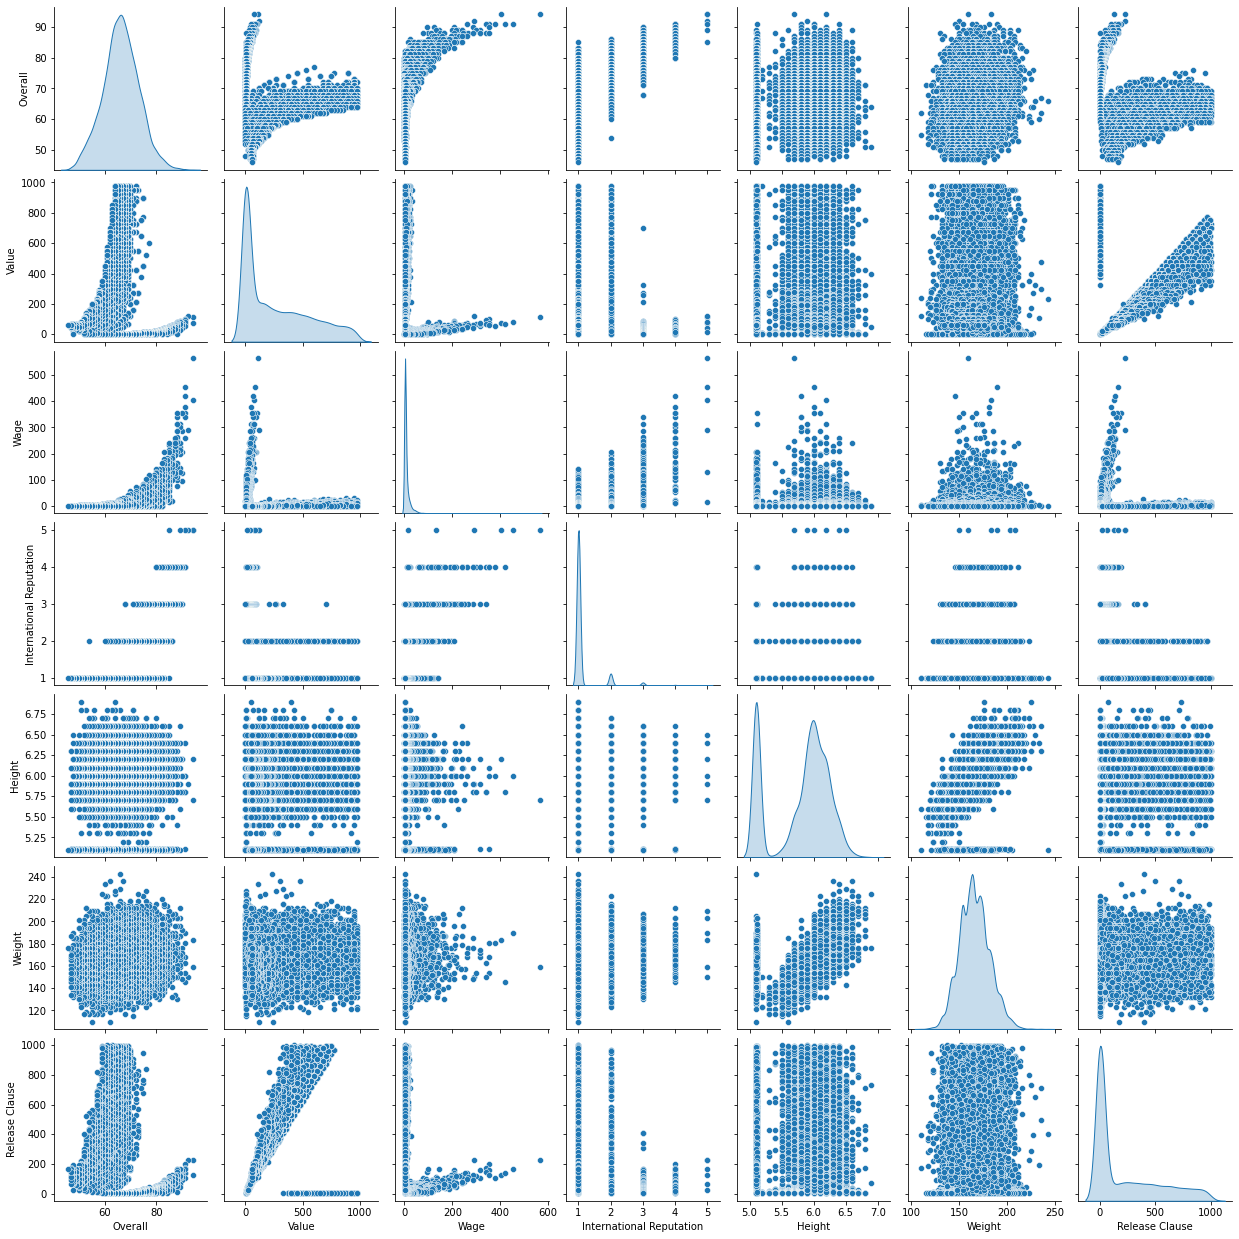

In [25]:
#2.	Generate pair plots for the following variables:
#  Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
sns.pairplot(df[['Overall', 'Value', 'Wage','International Reputation', 'Height', 'Weight','Release Clause']], diag_kind = 'kde')
plt.show()

In [26]:
#3.	Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

df['Contract_expires']=pd.DatetimeIndex(df['Contract Valid Until']).year

In [27]:
df2=df[df['Contract_expires']==2020]
df2

,ID,Name,Age,Overall,Club,Value,Wage,International Reputation,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Contract_expires
3,193080,De Gea,27,91,Manchester United,72.0,260.0,4.0,GK,2011,NaN,2020-01-01,6.4,168.0,138.6,2020.0
5,183277,E. Hazard,27,91,Chelsea,93.0,340.0,4.0,LF,2012,NaN,2020-01-01,5.8,163.0,172.1,2020.0
6,177003,L. Modrić,32,91,Real Madrid,67.0,420.0,4.0,RCM,2012,NaN,2020-01-01,5.8,146.0,137.4,2020.0
8,155862,Sergio Ramos,32,91,Real Madrid,51.0,380.0,4.0,RCB,2005,NaN,2020-01-01,6.0,181.0,104.6,2020.0
13,168542,David Silva,32,90,Manchester City,60.0,285.0,4.0,LCM,2010,NaN,2020-01-01,5.8,148.0,111.0,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18166,243621,N. Ayéva,16,48,Örebro SK,70.0,1.0,1.0,ST,2018,NaN,2020-01-01,5.1,154.0,158.0,2020.0
18179,246243,J. Williams,17,48,Northampton Town,50.0,1.0,1.0,CB,2018,NaN,2020-01-01,6.2,163.0,119.0,2020.0
18187,240158,C. Ehlich,19,47,SpVgg Unterhaching,40.0,1.0,1.0,RB,2017,NaN,2020-01-01,5.1,161.0,66.0,2020.0
18189,240160,A. Kaltner,18,47,SpVgg Unterhaching,60.0,1.0,1.0,ST,2017,NaN,2020-01-01,5.1,165.0,125.0,2020.0


In [28]:
df['Rank']=df['Overall'].rank(method='dense',ascending =False)
df

,ID,Name,Age,Overall,Club,Value,Wage,International Reputation,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Contract_expires,Rank
0,158023,L. Messi,31,94,FC Barcelona,110.5,565.0,5.0,RF,2004,NaN,2021-01-01,5.70,159.0,226.5,2021.0,1.0
1,20801,Cristiano Ronaldo,33,94,Juventus,77.0,405.0,5.0,ST,2018,NaN,2022-01-01,6.20,183.0,127.1,2022.0,1.0
2,190871,Neymar Jr,26,92,Paris Saint-Germain,118.5,290.0,5.0,LW,2017,NaN,2022-01-01,5.90,150.0,228.1,2022.0,2.0
3,193080,De Gea,27,91,Manchester United,72.0,260.0,4.0,GK,2011,NaN,2020-01-01,6.40,168.0,138.6,2020.0,3.0
4,192985,K. De Bruyne,27,91,Manchester City,102.0,355.0,4.0,RCM,2015,NaN,2023-01-01,5.11,154.0,196.4,2023.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,47,Crewe Alexandra,60.0,1.0,1.0,CM,2017,NaN,2019-01-01,5.90,134.0,143.0,2019.0,47.0
18203,243165,N. Christoffersson,19,47,Trelleborgs FF,60.0,1.0,1.0,ST,2018,NaN,2020-01-01,6.30,170.0,113.0,2020.0,47.0
18204,241638,B. Worman,16,47,Cambridge United,60.0,1.0,1.0,ST,2017,NaN,2021-01-01,5.80,148.0,165.0,2021.0,47.0
18205,246268,D. Walker-Rice,17,47,Tranmere Rovers,60.0,1.0,1.0,RW,2018,NaN,2019-01-01,5.10,154.0,143.0,2019.0,47.0


In [29]:
Top_20=df.sort_values('Rank').head(20)
Top_20

,ID,Name,Age,Overall,Club,Value,Wage,International Reputation,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Contract_expires,Rank
0,158023,L. Messi,31,94,FC Barcelona,110.5,565.0,5.0,RF,2004,NaN,2021-01-01,5.70,159.0,226.5,2021.0,1.0
1,20801,Cristiano Ronaldo,33,94,Juventus,77.0,405.0,5.0,ST,2018,NaN,2022-01-01,6.20,183.0,127.1,2022.0,1.0
2,190871,Neymar Jr,26,92,Paris Saint-Germain,118.5,290.0,5.0,LW,2017,NaN,2022-01-01,5.90,150.0,228.1,2022.0,2.0
3,193080,De Gea,27,91,Manchester United,72.0,260.0,4.0,GK,2011,NaN,2020-01-01,6.40,168.0,138.6,2020.0,3.0
4,192985,K. De Bruyne,27,91,Manchester City,102.0,355.0,4.0,RCM,2015,NaN,2023-01-01,5.11,154.0,196.4,2023.0,3.0
5,183277,E. Hazard,27,91,Chelsea,93.0,340.0,4.0,LF,2012,NaN,2020-01-01,5.80,163.0,172.1,2020.0,3.0
6,177003,L. Modrić,32,91,Real Madrid,67.0,420.0,4.0,RCM,2012,NaN,2020-01-01,5.80,146.0,137.4,2020.0,3.0
7,176580,L. Suárez,31,91,FC Barcelona,80.0,455.0,5.0,RS,2014,NaN,2021-01-01,6.00,190.0,164.0,2021.0,3.0
8,155862,Sergio Ramos,32,91,Real Madrid,51.0,380.0,4.0,RCB,2005,NaN,2020-01-01,6.00,181.0,104.6,2020.0,3.0
13,168542,David Silva,32,90,Manchester City,60.0,285.0,4.0,LCM,2010,NaN,2020-01-01,5.80,148.0,111.0,2020.0,4.0


In [30]:
#a)	What would the average wage for this set of players be?
df['Wage'].mean()

9.731312132696216

In [31]:
#b)	What is the average age?
df['Age'].mean()

25.122205745043114

In [32]:
#c)	Is there a correlation between the Overall rating and Value for these players?
df[['Overall','Value']].corr()

,Overall,Value
Overall,1.00000,-0.23333
Value,-0.23333,1.00000


# 4.	Generate tables containing the top 5 players by Overall rating for each unique position.

In [34]:
df.Position.replace(np.nan, df.Position.value_counts().idxmax(), inplace = True)
df1 = df.groupby(['Position'])
df2= df1.apply(lambda x: x.sort_values(["Overall"], ascending = False))
df2=df2.reset_index(drop=True)
Pos = pd.Series(df2.Position.unique())
for i in Pos:
    sub_table = df2.loc[df2.Position == i][['Name', 'Position']].head(5)
    print(sub_table)

              Name Position
0     A. Griezmann      CAM
1       C. Eriksen      CAM
2  Roberto Firmino      CAM
3        T. Müller      CAM
4          M. Özil      CAM
            Name Position
958     D. Godín       CB
959    S. Umtiti       CB
960   M. Benatia       CB
961  N. Otamendi       CB
962        Naldo       CB
                 Name Position
2736  Sergio Busquets      CDM
2737         Casemiro      CDM
2738        M. Pjanić      CDM
2739      Fernandinho      CDM
2740          Fabinho      CDM
              Name Position
3684  Luis Alberto       CF
3685   S. Giovinco       CF
3686      A. Milik       CF
3687     L. Stindl       CF
3688       Raffael       CF
                     Name Position
3758               Thiago       CM
3759  S. Milinković-Savić       CM
3760             Jorginho       CM
3761          I. Gündoğan       CM
3762             N. Keïta       CM
               Name Position
5152         De Gea       GK
5153       J. Oblak       GK
5154  M. ter Stegen      

In [35]:
# b) What is the average wage one can expect to pay for the top 5 in every position?

df3 = df2.groupby('Position').head(5)
df3['Wage'].groupby(df3['Position']).mean()

Position
CAM    174.0
CB     139.6
CDM    217.0
CF      47.4
CM     130.6
GK     192.8
LAM     81.6
LB     177.2
LCB    162.0
LCM    184.4
LDM    126.6
LF     121.2
LM     164.6
LS     130.2
LW     261.0
LWB     34.2
RAM     45.4
RB     155.4
RCB    231.0
RCM    240.8
RDM    105.0
RF     148.0
RM     131.4
RS     132.2
RW     202.0
RWB     44.2
ST     294.0
Name: Wage, dtype: float64